# **Group Exercises: Stellar Evolution**
###The aim of this exercise is to learn more about stellar evolution through motion on the HR diagram. 

###You will be using several common python libraries in addition to Astronomy specific tools to visualize the HR diagram and interpret meaning from your visualizations.

> *Instructions:*  Save a copy of this Colab notebook to your own Google Drive folder **adding your name to the filename** and open in Google Colaboratory. When you have completed the exercise you will need to upload a .pdf of the Colab notebook to canvas. Instructions on how to download a .pdf of this notebook are found at the end of the exercise.

> *Documentation:* Additional resources on how to use Google Colab, enter answers, view code, and which Python libaries are used can be found in the documentation file.

> Don't forget that you need to run every code block **including** the ones where you input information. This does not include *text blocks* where you are writing your answers. **If you experience any issues, navigate to runtime in the menu bar and select 'Restart and run all'.**

>    *Honor Statement:* Recall that your name on this worksheet is considered to be a reaffirmation of your commitment to the Dartmouth Honor Principle. No internet, phones, or calculators are allowed on these worksheets, although you may use your textbooks and notes. The are a total of 6 points.

---

## Group Members: *add your group members here by double clicking on this cell*.

___

In [1]:
#@title  { vertical-output: false, display-mode: "form" }

##this block imports all the libraries and functions used in the exercise
%matplotlib notebook
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import math
# add widget for selection
import ipywidgets as widgets 
import time

##Solar parameters
L_sun=1 ##J/s
R_sun=6.96*10**8 ##meter
T_sun=5780 ##Kelvin
Mag_sun= 4.83

# Read the star data extracted from example
df_example = pd.read_csv('https://raw.githubusercontent.com/difuse-dartmouth/21w_ASTR15/main/Module_Data/Stellar_Evolution_Datasets/HRstars.csv')

# function to drop unnecessary columns 
def drop_columns(df):
  df = df.drop(['#EEP','LogG'], axis=1)
  return df

# performs back transformation on temp, luminosity
def log_transformation(df):
  df['Teff'] = 10 ** df['LogTeff']
  df['L/Lo'] = 10 ** df['LogL/Lo']
  return df

def HRD_example(ADDSTAR, Temperature, Luminosity):
  xhr=np.array(df_example['Teff']); yhr= np.array(df_example['L/Lo'])
  zhr=pow(np.array(yhr)/pow(np.array(xhr)/T_sun,4),0.25)
  zhr=12*zhr/min(zhr)

  # Plot background HR Diagram
  cm = plt.cm.get_cmap('RdYlBu')
  ax.scatter(xhr, yhr, c=xhr, cmap=cm, s=zhr, zorder=2, alpha=0.8)

  ADDSTAR = ADDSTAR.lower()

  if ADDSTAR=='yes':
    thestar=ax.scatter(Temperature, Luminosity, color='lightseagreen',lw=2, s=500,\
                        marker='*', facecolor='none', zorder=3)
    return thestar

# ADDSTAR - either 'yes' or 'no'
# Temperature of the star to be added
# Luminosity of the star to be added
def HRD_cluster(ADDSTAR, Temperature, Luminosity, data='Color'):
    # set up the figure, the axis, and the plot element
    fig=plt.figure(figsize=(20,12))
    ax=plt.gca()
    ax.set_facecolor("black")
    ax.tick_params(axis = 'both', which = 'major', labelsize = 18)

    data = data.lower()
    ADDSTAR = ADDSTAR.lower()

    if data=='color':
      ax.invert_yaxis()
      ax.set_xlabel(r'Color (BP-RP)', fontsize=30)
      ax.set_ylabel(r'Magnitude (G)', fontsize=30)
      ax.set_title('HR Diagram: Evolution of Cluster', fontsize=35)
      ax.set_ylim(15,-5)
      ax.set_xlim(-1, 3)

      plt.plot(df_formation['Gaia_BP-RP'], df_formation['Gaia_G'], alpha=1, lw=3, color='white')
      #plt.scatter(df_10mil['Gaia_BP-RP'], df_10mil['Gaia_G'], s=5, alpha=0.6, color='green')
      #plt.scatter(df_100mil['Gaia_BP-RP'], df_100mil['Gaia_G'], s=5, alpha=0.6, color='magenta')
      plt.plot(df_1bil['Gaia_BP-RP'], df_1bil['Gaia_G'], alpha=1, lw=3, color='orange')
      plt.plot(df_5bil['Gaia_BP-RP'], df_5bil['Gaia_G'], alpha=1, lw=3,  color='coral')
      plt.plot(df_10bil['Gaia_BP-RP'], df_10bil['Gaia_G'], alpha=1, lw=3)

    elif data=='temp':
      ax.invert_xaxis()
      ax.set_xscale('log')
      ax.set_yscale('log')
      ax.set_xlabel(r'$Temperature\ (K)$', fontsize=30)
      ax.set_ylabel(r'$Luminosity\ (solar\ units)$', fontsize=30)
      ax.set_title('HR Diagram: Evolution of Cluster', fontsize=35)

      plt.plot(df_formation['Teff'], df_formation['L/Lo'], alpha=1, lw=3,  color='white')
      plt.plot(df_1bil['Teff'], df_1bil['L/Lo'], alpha=1, lw=3,  color='orange')
      plt.plot(df_5bil['Teff'], df_5bil['L/Lo'], alpha=1, lw=3,  color='coral')
      plt.plot(df_10bil['Teff'], df_10bil['L/Lo'], alpha=1, lw=3)

      if ADDSTAR=='yes':
        thestar=ax.scatter(Temperature, Luminosity, color='lightseagreen',lw=2, s=500,\
                          marker='*', facecolor='none', zorder=3)
        return thestar

    else:
      print('Incorrect 4th parameter: must be either \'color\' or \'temp\'')

    plt.legend(["ZAMS","1bil", "5bil", "10bil"], markerscale = 10, fontsize = 'x-large') 
    plt.show()

## We will start with a simple visualization of the HR relationship. This diagram colors the individual stars by their spectral sequence with red being the cooler stars and blue hotter.  
Run the block of code below to import the example dataset and display the plot.


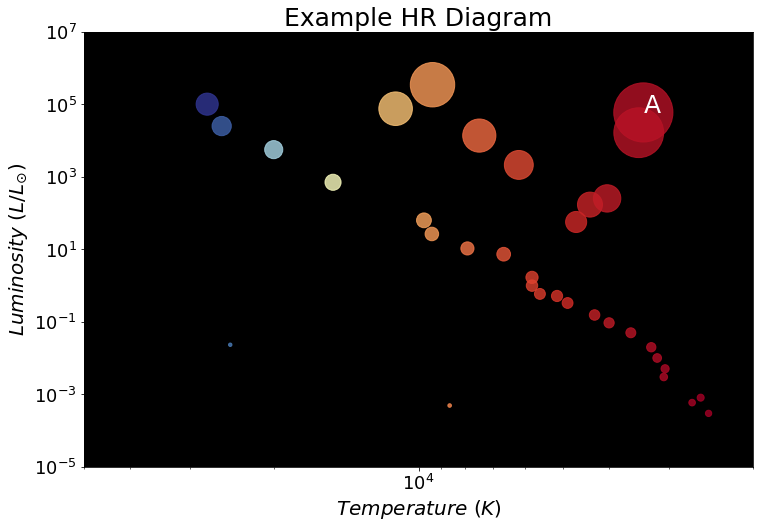

In [2]:
#@title  { vertical-output: false, display-mode: "form" }
# First set up the figure, the axis, and the plot element we want to animate
fig=plt.figure(figsize=(12,8))
ax=plt.gca()
ax.set_facecolor("black")
ax.set_xlim(2000,50000)
ax.set_ylim(10**-5,10**7)
ax.invert_xaxis()
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.set_xlabel(r'$Temperature\ (K)$', fontsize=20)
ax.set_ylabel(r'$Luminosity\ (L/L_{\odot})$', fontsize=20)
ax.set_title('Example HR Diagram', fontsize=25)
ax.annotate('A', xy=(df_example.loc[3]['Teff'], df_example.loc[3]['L/Lo']), color='white', fontsize=25)

HRD_example('no', T_sun, L_sun)

## **1.** Explain Star A's deviation from the main sequence. What does this imply about the fusion reactions in its core? What about the core's composition? _Provide your response in the cell below_.

---

## **2.** Considering the Stefan-Boltzmann Law, why stars in the upper right of the HR diagram are larger than those in the lower right?

---

## Next, run this block of code to generate and view the first five rows of the Pandas dataframe table used for this exercise.
>Pandas is a set of python codes that are used to work with large and complex data tables, and is widely used in data science.

In [3]:
def create_df(url, cut=None):
  df = pd.read_csv(url)
  df = drop_columns(df)
  df = log_transformation(df)
  df['Gaia_BP-RP'] = df['Gaia_BP'] - df['Gaia_RP']
  if cut is not None:
    df = df.loc[df.index<cut]
  #df.sort_values(by='LogTeff', ascending=True, inplace=True)
  return df

#@title  { vertical-output: true, display-mode: "form" }
url = 'https://raw.githubusercontent.com/difuse-dartmouth/21w_ASTR15/main/Module_Data/Stellar_Evolution_Datasets/formation.csv'
df = create_df(url)
tmp = df.loc[33]

url = 'https://raw.githubusercontent.com/difuse-dartmouth/21w_ASTR15/main/Module_Data/Stellar_Evolution_Datasets/1bil.csv'
df_1bil = create_df(url)

# creating a fake ZAMS sequence since not avaialable
df_formation = create_df(url, cut=60).append(tmp)

url = 'https://raw.githubusercontent.com/difuse-dartmouth/21w_ASTR15/main/Module_Data/Stellar_Evolution_Datasets/5bil.csv'
df_5bil = create_df(url)

url = 'https://raw.githubusercontent.com/difuse-dartmouth/21w_ASTR15/main/Module_Data/Stellar_Evolution_Datasets/10bil.csv'
df_10bil = create_df(url)

# the dataframe for the unknown isochrone question
url = 'https://raw.githubusercontent.com/difuse-dartmouth/21w_ASTR15/main/Module_Data/Stellar_Evolution_Datasets/unknown.csv'
df_unknown = create_df(url).sample(n=25, replace=False)


# view first 5 lines of the 1st df
df_formation.head()

,M/Mo,LogTeff,LogL/Lo,Gaia_G,Gaia_BP,Gaia_RP,Teff,L/Lo,Gaia_BP-RP
0,0.112828,3.5345,-2.7407,12.1904,13.3714,11.1693,3423.733876,0.001817,2.2021
1,0.122946,3.5394,-2.6398,11.9113,13.0515,10.9053,3462.581465,0.002292,2.1462
2,0.136266,3.5452,-2.5227,11.5876,12.6828,10.5992,3509.134384,0.003001,2.0836
3,0.159854,3.5547,-2.3598,11.1318,12.1597,10.1711,3586.740858,0.004367,1.9886
4,0.199705,3.5679,-2.1585,10.5666,11.5128,9.6426,3697.430335,0.006942,1.8702


## Run the next cell to visualize the evolution of the single cluster. *You can select different isochrones with the dropdown below.* 

In [4]:
#@title  { vertical-output: true, display-mode: "form" }

age_widget = widgets.Dropdown(
    options=['All', 'ZAMS','1 Billion', '5 Billion', '10 Billion'],
    value='All',
    description='Age:',
    disabled=False,
)

def display_isochrone(age):
      fig=plt.figure(figsize=(20,12))
      ax=plt.gca()
      ax.set_facecolor("black")
      ax.invert_yaxis()
      ax.set_xlabel(r'Color (BP-RP)', fontsize=30)
      ax.set_ylabel(r'Magnitude (G)', fontsize=30)
      ax.set_title('HR Diagram', fontsize=35)
      ax.set_ylim(15,-5)
      ax.set_xlim(-1, 3)

      if age=='ZAMS':
        ax.set_title('HR Diagram: ZAMS', fontsize=35)
        plt.plot(df_formation['Gaia_BP-RP'], df_formation['Gaia_G'], alpha=1, lw=3, color='white')
        plt.show()
        
      elif age=='1 Billion':
        # 1 bil
        ax.set_title('HR Diagram: 1 Billion', fontsize=35)
        plt.plot(df_1bil['Gaia_BP-RP'], df_1bil['Gaia_G'], alpha=1, lw=3, color='orange')
        plt.show()

      elif age=='5 Billion':
        # 5 bil
        ax.set_title('HR Diagram: 5 Billion', fontsize=35)
        plt.plot(df_5bil['Gaia_BP-RP'], df_5bil['Gaia_G'], alpha=1, lw=3, color='coral')
        plt.show()

      elif age=='10 Billion':
        # 10 bil
        ax.set_title('HR Diagram: 10 Billion', fontsize=35)
        plt.plot(df_10bil['Gaia_BP-RP'], df_10bil['Gaia_G'], alpha=1, lw=3)
        plt.show()

      if age=='All':
        plt.close()
        HRD_cluster(ADDSTAR='no', Temperature=T_sun, Luminosity=L_sun, data='color')

widgets.interact(display_isochrone, age=age_widget)

interactive(children=(Dropdown(description='Age:', options=('All', 'ZAMS', '1 Billion', '5 Billion', '10 Billi…

<function __main__.display_isochrone>

## **3.** How does the main sequence turn-off change over time?

---

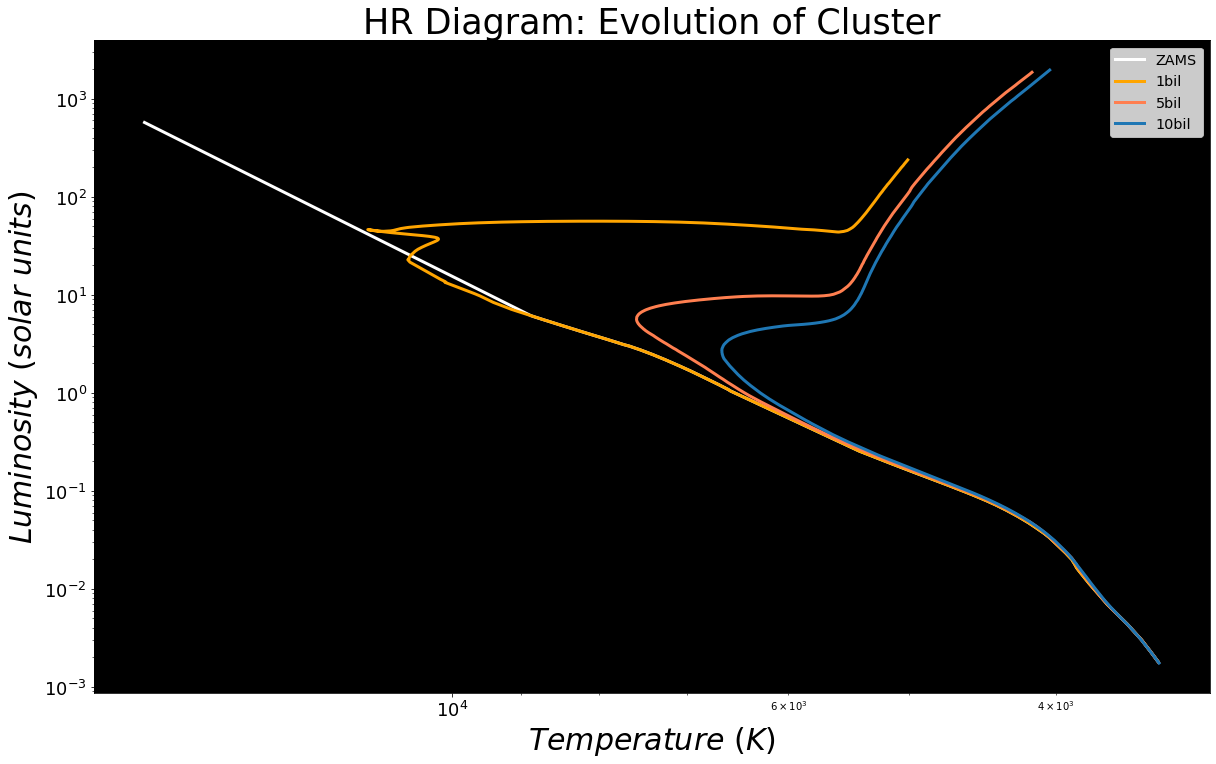

In [5]:
#@title  { vertical-output: true, display-mode: "form" }
HRD_cluster(ADDSTAR='no', Temperature=T_sun, Luminosity=L_sun, data='temp')

## **4a.** The visualization above plots temperature v. luminosity, but you have also seen HR diagrams with color v. magnitude. Why can the x-axis can be either temperature or color? Considering color, what can effect the observed color of a star (compared to its intrinsic color)? 

---

## **4b.** Why can the y-axis of a color-magnitude diagram be represented as either absolute magnitude or luminosity? 

---

## **4c.** If we consider stars in a single cluster (which are all at basically the same distance) we could use apparent magnitude instead of absolute magnitude. Why can we use apparent magnitude in this one case?

---

## **5.** The cluster $\chi$ Persei has high-mass O stars at the upper end of the Main Sequence. To what temperature does an O star correspond? What can you infer about the age of the cluster based on the presence of O stars?

---

## **6.** A group of stars all has an unknown age, but are all the same age. By comparing them to the isochrones you've been looking at, estimate the age of this group of stars.

Run the cell below to generate the HR diagram showing the stars of unknown age (green points). Each of you will have a slightly different set of stars since they are randomly selected. You can then select the isochrone age to overplot using the dropdown menu. 

In [7]:
#@title  { vertical-output: true, display-mode: "form" }

age_widget = widgets.Dropdown(
    options=['---', 'ZAMS', '1 Billion', '5 Billion', '10 Billion'],
    value='---',
    description='Age:',
    disabled=False,
)

def display_isochrone(age):
      fig=plt.figure(figsize=(20,12))
      ax=plt.gca()
      ax.set_facecolor("black")
      ax.invert_yaxis()
      ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
      ax.set_xlabel(r'Color (BP-RP)', fontsize=30)
      ax.set_ylabel(r'Magnitude (G)', fontsize=30)
      ax.set_title('HR Diagram', fontsize=35)
      ax.set_ylim(15,-5)
      ax.set_xlim(-1, 3)

      plt.scatter(df_unknown['Gaia_BP-RP'], df_unknown['Gaia_G'],s=50, zorder=5, color='chartreuse')

      if age=='ZAMS':
        # 0 bil
        ax.set_title('HR Diagram: ZAMS', fontsize=35)
        plt.plot(df_formation['Gaia_BP-RP'], df_formation['Gaia_G'], alpha=1, lw=3, color='white')
        plt.show()
        
      if age=='1 Billion':
        # 1 bil
        ax.set_title('HR Diagram: 1 Billion', fontsize=35)
        plt.plot(df_1bil['Gaia_BP-RP'], df_1bil['Gaia_G'], alpha=1, lw=3, color='orange')
        plt.show()

      elif age=='5 Billion':
        # 5 bil
        ax.set_title('HR Diagram: 5 Billion', fontsize=35)
        plt.plot(df_5bil['Gaia_BP-RP'], df_5bil['Gaia_G'], alpha=1, lw=3, color='coral')
        plt.show()

      elif age=='10 Billion':
        # 10 bil
        ax.set_title('HR Diagram: 10 Billion', fontsize=35)
        plt.plot(df_10bil['Gaia_BP-RP'], df_10bil['Gaia_G'], alpha=1, lw=3)
        plt.show()

widgets.interact(display_isochrone, age=age_widget)

interactive(children=(Dropdown(description='Age:', options=('---', 'ZAMS', '1 Billion', '5 Billion', '10 Billi…

<function __main__.display_isochrone>

### What is the (approximate) age of the unknown stars?

---

###**Downloading Instructions:** When your group has completed this exercise, download a .pdf of this notebook and upload it to Canvas. You can do this by going to File>Print>Destination>Save to PDF. 

> *Note:* you might have to play with the document scale (under More Settings) to ensure plots are not cut off. If you have difficulty producing the .pdf without errors try using a different web browser.